In [1]:
# Import Library
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('avocado.csv', usecols=range(1,14),nrows=1499)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape

(1499, 13)

In [6]:
len(df.region.unique())
df.groupby('type').size()

,0
type,
conventional,1499


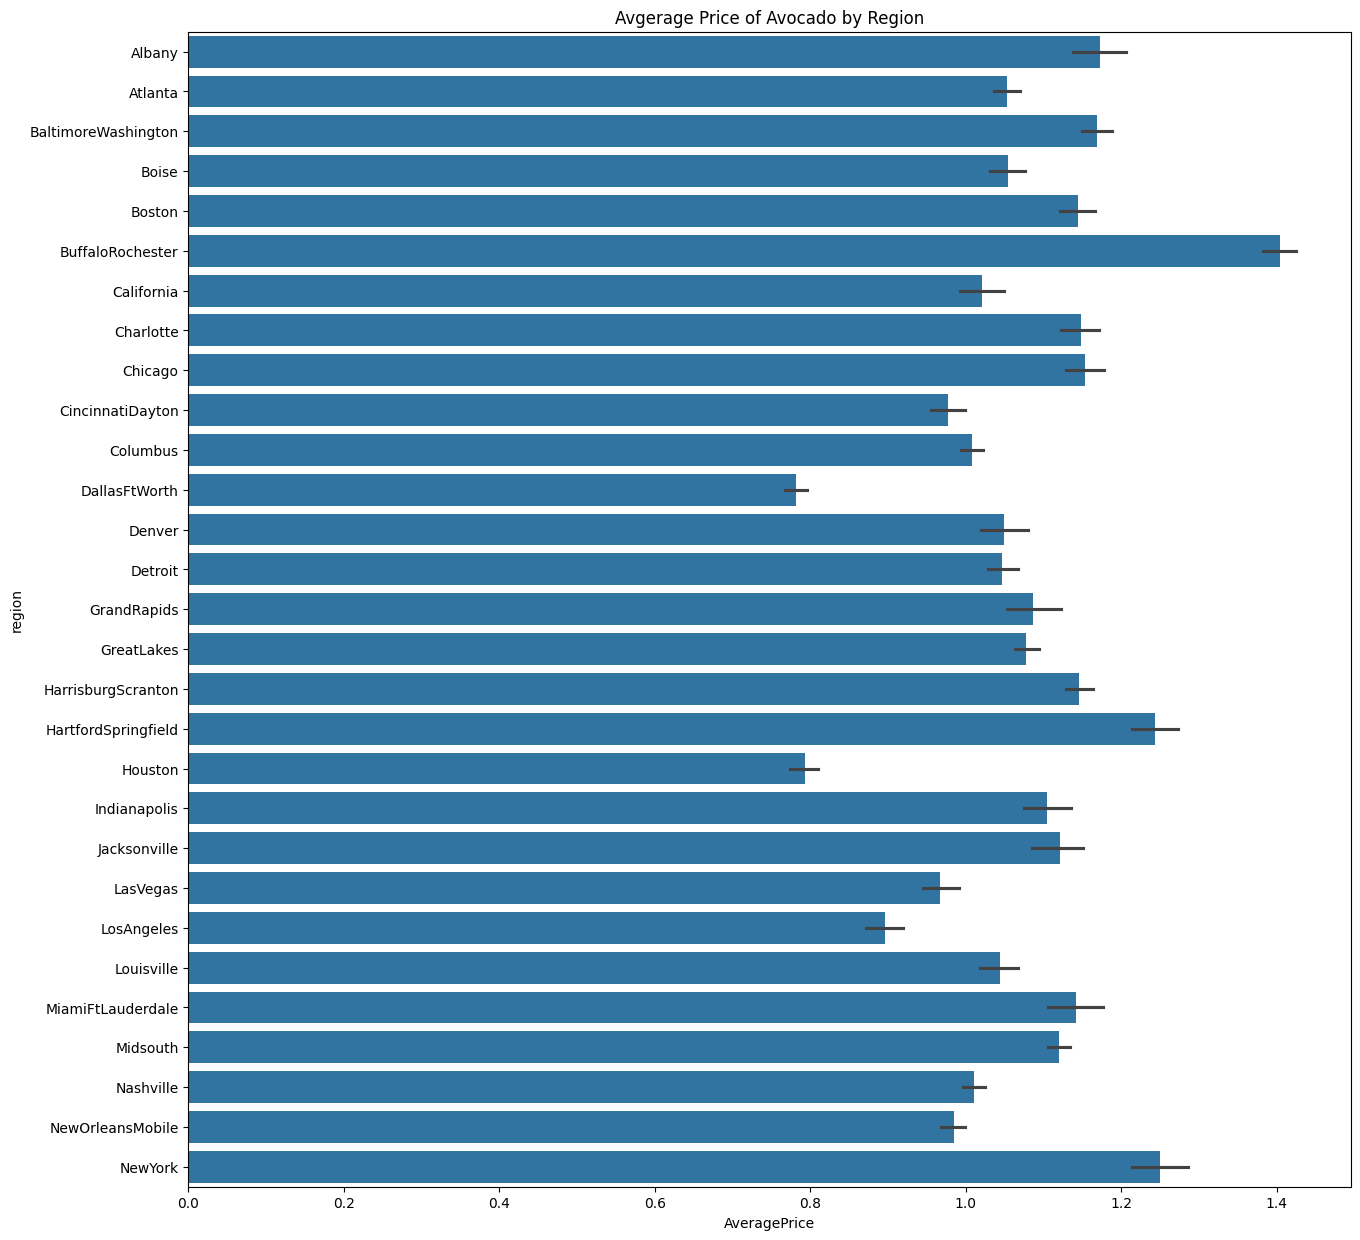

1


In [7]:
plt.figure(figsize=(15,15))
plt.title("Avgerage Price of Avocado by Region")
sns.barplot(x="AveragePrice",y="region",data= df)
plt.show()
print(len(df.type.unique()))

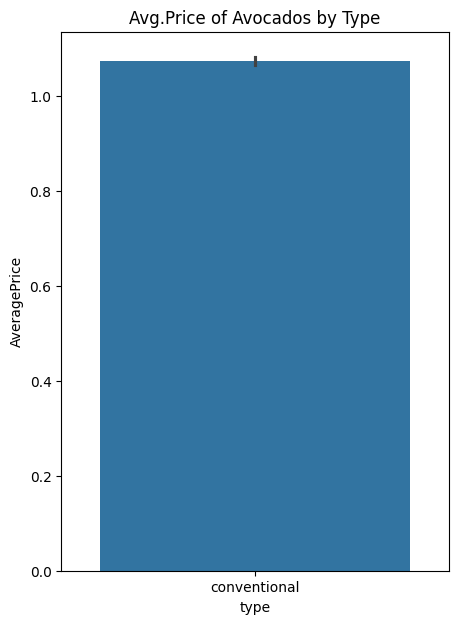

In [8]:
df.groupby('type').size()
plt.figure(figsize=(5,7))
plt.title("Avg.Price of Avocados by Type")
sns.barplot(x="type",y="AveragePrice",data= df)
plt.show()

In [9]:
# Specifying dependent and independent variables
X = df[['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']]
y = df['AveragePrice']
y=np.log1p(y)
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
y.head()

,AveragePrice
0,0.845868
1,0.854415
2,0.657520
3,0.732368
4,0.824175


In [11]:
X = pd.get_dummies(X, prefix=["type","region"], columns=["type","region"], drop_first = True)
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region_Atlanta,region_BaltimoreWashington,region_Boise,...,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 99)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1049, 35), (450, 35), (1049,), (450,))

In [13]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

svr.fit(X_train,y_train)
print(svr.score(X_train,y_train))

-141644445682.9105


In [14]:
from math import sqrt
# calculate RMSE
error = sqrt(metrics.mean_squared_error(y_valid,svr.predict(X_valid)))
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 24393.171163605522


<ipython-input-15-f1f5ea1aed3e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_valid - svr.predict(X_valid))


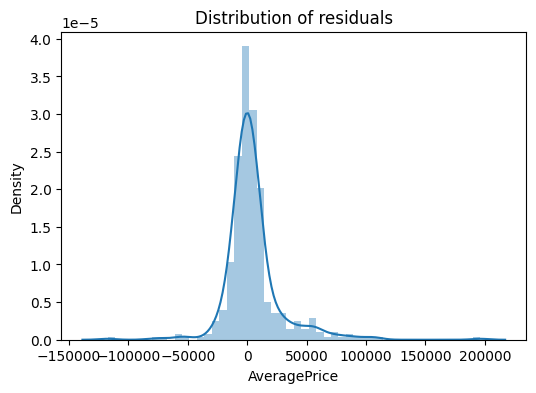

In [15]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_valid - svr.predict(X_valid))
plt.title('Distribution of residuals')
plt.show()

In [16]:
# SVR RMSE               :
print('RMSE value of the SVR Model   : ',round(np.sqrt(metrics.mean_squared_error(y_valid, svr.predict(X_valid))),4))

RMSE value of the SVR Model   :  24393.1712
